In [4]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np #For handling arrays
import pandas as pd # For handling data
#Define Directories for train, test & Validation Set
train_path = "C:/Users/Kavya Rayidi/Downloads/ChestXRay2017/chest_xray/train"
test_path = "C:/Users/Kavya Rayidi/Downloads/ChestXRay2017/chest_xray/test"
valid_path = "C:/Users/Kavya Rayidi/Downloads/ChestXRay2017/chest_xray/test"
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16
#The dimension of the images we are going to define is 500x500 
img_height = 500
img_width = 500
#The dimension size of 5

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True, 
 )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255 )

In [6]:
train = image_gen.flow_from_directory(
train_path,
target_size=(img_height, img_width),
color_mode='grayscale',
class_mode='binary',
batch_size=batch_size
 )
test = test_data_gen.flow_from_directory(
test_path,
target_size=(img_height, img_width),
color_mode='grayscale',
shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without hav
class_mode='binary',
batch_size=batch_size
 )
valid = test_data_gen.flow_from_directory(
valid_path,
target_size=(img_height, img_width),
color_mode='grayscale',
class_mode='binary', 
batch_size=batch_size
 )


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


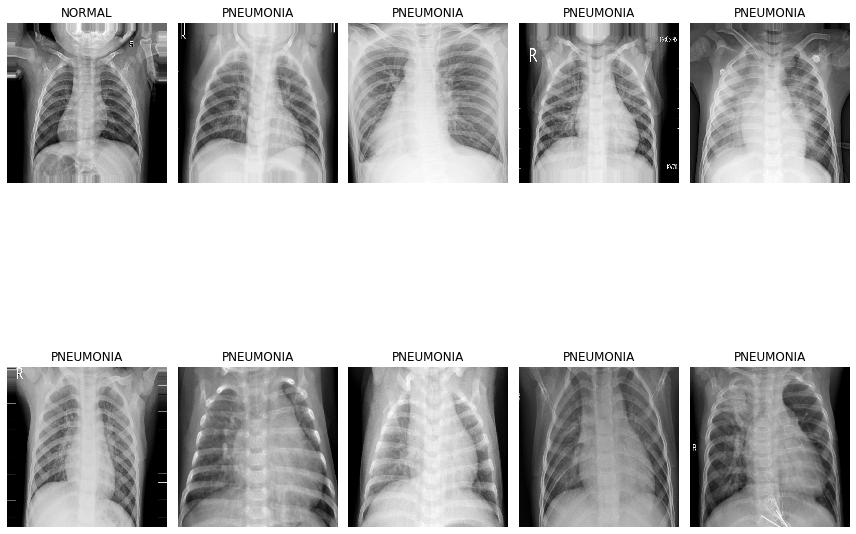

In [7]:
import matplotlib.pyplot as plt
# example of loading an image with the Keras API
from tensorflow.keras.preprocessing.image import load_img
plt.figure(figsize=(12, 12))
for i in range(0, 10):
 plt.subplot(2, 5, i+1)
 for X_batch, Y_batch in train:
        image = X_batch[0] 
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [9]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0

In [26]:
early = EarlyStopping(monitor="al_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.5)
callbacks_list = [ early, learning_rate_reduction]

In [28]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', classes = np.unique(train.classes), y = train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)


{0: 1.939214232765011, 1: 0.6737058975019315}


In [29]:
cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)


Epoch 1/25
327/327 [==============================] - 802s 2s/step - loss: 0.3882 - accuracy: 0.8133 - val_loss: 0.4301 - val_accuracy: 0.8013 - lr: 0.0010
Epoch 2/25
327/327 [==============================] - 800s 2s/step - loss: 0.2648 - accuracy: 0.8993 - val_loss: 0.3177 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 3/25
327/327 [==============================] - 788s 2s/step - loss: 0.2307 - accuracy: 0.9090 - val_loss: 0.3776 - val_accuracy: 0.8638 - lr: 0.0010
Epoch 4/25
327/327 [==============================] - 783s 2s/step - loss: 0.1950 - accuracy: 0.9239 - val_loss: 0.2995 - val_accuracy: 0.8558 - lr: 0.0010
Epoch 5/25
327/327 [==============================] - 783s 2s/step - loss: 0.1701 - accuracy: 0.9300 - val_loss: 0.2971 - val_accuracy: 0.8894 - lr: 0.0010
Epoch 6/25
327/327 [==============================] - 815s 2s/step - loss: 0.1794 - accuracy: 0.9270 - val_loss: 0.3544 - val_accuracy: 0.8782 - lr: 0.0010
Epoch 7/25
327/327 [==============================] - ETA: 0s - 

Epoch 21/25
327/327 [==============================] - 796s 2s/step - loss: 0.0859 - accuracy: 0.9658 - val_loss: 0.2641 - val_accuracy: 0.9054 - lr: 1.5625e-05
Epoch 22/25
327/327 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9687WARNING:tensorflow:Early stopping conditioned on metric `al_loss` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 22: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
327/327 [==============================] - 798s 2s/step - loss: 0.0845 - accuracy: 0.9687 - val_loss: 0.2656 - val_accuracy: 0.9038 - lr: 1.5625e-05
Epoch 23/25
327/327 [==============================] - 810s 2s/step - loss: 0.0878 - accuracy: 0.9662 - val_loss: 0.2529 - val_accuracy: 0.9119 - lr: 7.8125e-06
Epoch 24/25
327/327 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9641WARNING:tensorflow:Early stopping conditioned on metric `al_loss` which is not available. Available metrics ar

<AxesSubplot:>

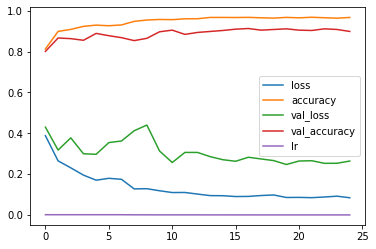

In [30]:
pd.DataFrame(cnn.history.history).plot()

In [31]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 21s 522ms/step - loss: 0.2640 - accuracy: 0.8990
The testing accuracy is : 89.90384340286255 %


In [32]:
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 22s 554ms/step


In [33]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1


<AxesSubplot:>

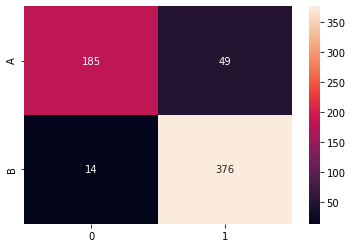

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["A","B"])
columns=["Predicted Normal", "Predicted Pneumonia"]
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [39]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.93      0.79      0.85       234
   PNEUMONIA       0.88      0.96      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624

